In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from torch.utils.data import Dataset,DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
class MultiClassData(Dataset):
    def __init__(self,X,y):
        super(MultiClassData,self).__init__()
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
        self.y = self.y.type(torch.LongTensor)
        self.len = self.X.shape[0]

    def __len__(self):
        return self.len
    
    def __getitem__(self,index):
        return self.X[index],self.y[index]


In [ ]:
train_dataloader = DataLoader(MultiClassData(X_train,y_train),batch_size=32,shuffle=True)

In [13]:
data = MultiClassData(X_train,y_train)
print(f"X: {data.X.shape}")
print(f"y: {data.y.shape}")

X: torch.Size([120, 4])
y: torch.Size([120])


In [55]:
class MutliClass(nn.Module):
    def __init__(self,input_size,output_size,hidden_feature):
        super(MutliClass,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_feature)
        self.l2 = nn.Linear(hidden_feature,output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    def forward(self,X):
        out1 = self.l1(X)
        out1 = torch.sigmoid(out1)
        out2 = self.l2(out1)
        final = self.softmax(out2)
        return final

In [56]:
input_dim = data.X.shape[1]
hidden = 6
num_classes = len(data.y.unique())

In [57]:
model = MutliClass(input_size=input_dim,output_size=num_classes,hidden_feature=hidden)

In [58]:
loss_fun = nn.CrossEntropyLoss()
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = lr)

In [59]:
NUM_EPOCH = 500
losses = []
for epoch in range(NUM_EPOCH):
    for i, (X,y) in enumerate(train_dataloader):
        optimizer.zero_grad()

        y_pred = model(X)
        loss = loss_fun(y_pred,y)

        loss.backward()

        optimizer.step()

    losses.append(float(loss.data.detach().numpy()))

In [60]:
losses

[1.2895383834838867,
 1.1347066164016724,
 1.2635340690612793,
 1.3367477655410767,
 1.1071321964263916,
 1.2148914337158203,
 1.0962625741958618,
 1.0884642601013184,
 1.1169131994247437,
 1.1684681177139282,
 1.0394846200942993,
 1.1787866353988647,
 1.1433775424957275,
 1.1100980043411255,
 1.0762301683425903,
 1.0279550552368164,
 1.024180293083191,
 1.061355710029602,
 1.0764374732971191,
 1.070061206817627,
 1.051025629043579,
 1.0434898138046265,
 1.0417438745498657,
 1.0382864475250244,
 1.0382448434829712,
 1.0337799787521362,
 1.0095046758651733,
 1.0282162427902222,
 1.0383137464523315,
 0.9768578410148621,
 1.0288275480270386,
 1.0217007398605347,
 0.9795427322387695,
 1.0349065065383911,
 1.0210540294647217,
 1.0114227533340454,
 1.018669843673706,
 0.9917759895324707,
 1.0219227075576782,
 1.0023027658462524,
 1.0043641328811646,
 0.991234540939331,
 1.0055161714553833,
 0.9978199005126953,
 0.9925797581672668,
 0.9781944751739502,
 0.9837996959686279,
 0.9837213158607483

<Axes: >

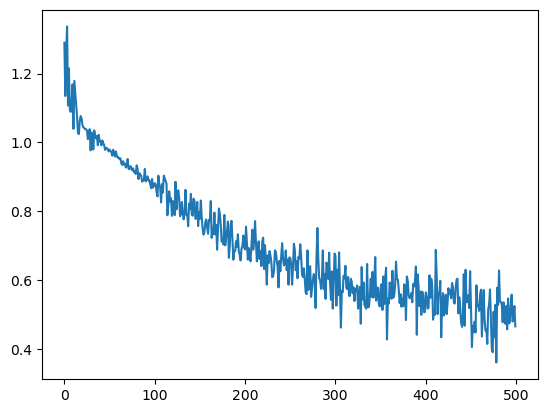

In [61]:
sns.lineplot(x=range(len(losses)),y=losses)

In [62]:
X_test_torch = torch.from_numpy(X_test)

In [63]:
with torch.no_grad():
    y_test_log = model(X_test_torch)
    y_test_pred = torch.max(y_test_log.data,1)

In [64]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [65]:
y_test_pred

torch.return_types.max(
values=tensor([-0.7562, -0.1171, -0.5752, -0.7489, -0.7471, -0.1277, -0.7409, -0.6968,
        -0.7235, -0.7229, -0.6975, -0.1455, -0.1044, -0.1471, -0.1153, -0.7416,
        -0.6100, -0.7260, -0.7573, -0.6139, -0.1634, -0.7001, -0.1479, -0.6162,
        -0.6418, -0.6661, -0.6080, -0.6151, -0.1533, -0.1669]),
indices=tensor([2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0]))

In [66]:
accuracy_score(y_test,y_test_pred.indices)

0.9333333333333333

In [67]:
from collections import Counter

In [72]:
most_common_count = Counter(y_test).most_common()[0][1]
print(f"Naive Classifier accuracy: {most_common_count/len(y_test)*100}")

Naive Classifier accuracy: 36.666666666666664
